In [1]:
import csv 
import os
import numpy as np
import random
from sklearn.metrics import roc_curve
import math
from matplotlib import pyplot
import datetime
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.signal import find_peaks
import plotly.graph_objects as go
from scipy import fft
from scipy import signal as sig
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from numpy import arange
from math import sqrt
from numpy import argmax
import random as rn
import h2o
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.metrics import precision_recall_curve
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft

In [2]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 5 hours 23 mins
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,2 months and 8 days
H2O_cluster_name:,H2O_from_python_khattab_b60nv0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.197 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
import pandas as pd
scaler = preprocessing.MinMaxScaler()

df2= pd.read_csv("F://phd//download//TTDD-main//TTDD-main//SDWA_PUB_WATER_SYSTEM.csv")
polution=df2.values[:,0:3]



          0           1     2
0      2014  Very Small   480
1      2013  Very Small   480
2      2012  Very Small   480
3      2011  Very Small   480
4      2015       Small  2445
...     ...         ...   ...
99995  2011  Very Small    25
99996  2015       Small   870
99997  2014  Very Small    25
99998  2013  Very Small    25
99999  2012  Very Small    25

[100000 rows x 3 columns]
             0
0     0.001467
1     0.001467
2     0.001467
3     0.007341
4     0.000192
...        ...
9995  0.000190
9996  0.000190
9997  0.000190
9998  0.000190
9999  0.000635

[10000 rows x 1 columns]


Text(0.5, 1.0, 'polution')

<Figure size 1600x800 with 0 Axes>

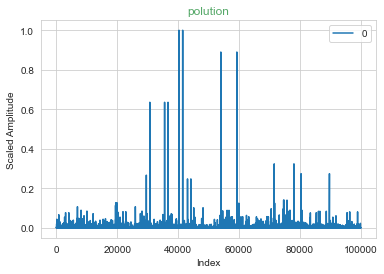

In [4]:


polution = pd.DataFrame(df2) 
#print(Nile)
polution = DataFrame(polution.values[0:100000,0:3])
print(polution)
polutiontest = DataFrame(polution.values[20000:30000,2:3])
polutiontest=DataFrame(scaler.fit_transform(polutiontest))
poltest=polutiontest
print(polutiontest)
pol = DataFrame(polution.values[0:100000,2:3])
pol=DataFrame(scaler.fit_transform(pol)) 
plt.figure(figsize=(20, 10), dpi=80)
pol.plot()
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("polution", color='g')



In [5]:

import statsmodels
from statsmodels.tsa.stattools import adfuller
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries)
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)
sTest = StationarityTests()
            

# KPSS Test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw,nlags=len(series)-1)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.04 else ""}stationary')



In [6]:

sTest.ADF_Stationarity_Test(pol, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))
kpss_test(pol)


Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -90.602279
P-Value                     0.000000
# Lags Used                 9.000000
# Observations Used     99990.000000
Critical Value (1%)        -3.430415
Critical Value (5%)        -2.861569
Critical Value (10%)       -2.566785
dtype: float64
Is the time series stationary? True
KPSS Statistic: 0.4999999999997774
p-value: 0.041666666666716805
num lags: 99999
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [7]:

from sklearn.metrics import confusion_matrix
pol = h2o.H2OFrame(pol)

pol=pol.fillna()


predictors = pol.col_names

# Define an Extended Isolation forest model
eif = H2OExtendedIsolationForestEstimator(ntrees =300,
                                          sample_size = 50)

#Train Extended Isolation Forest
eif.train(x = predictors, training_frame = pol)
polutiontest = h2o.H2OFrame(polutiontest)

eif_result = eif.predict(polutiontest.fillna())



anomaly_score = eif_result["anomaly_score"]
print(len(anomaly_score),anomaly_score)

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
10000 

anomaly_score
0.658416
0.658416
0.658416
0.780102
0.480597
0.480597
0.480597
0.480597
0.54702
0.543571


In [8]:
rr=polution.values[20000:30000,2:3]
for j in range(0,10000):
 if (polution.values[j+20000,1:2]== 'Very Large' ):
  rr[j] = 1
 else:
  rr[j] =0


dd=h2o.as_list(anomaly_score)
dds=dd
print(dds)
ff=h2o.as_list(h2o.H2OFrame(rr))

fpr, tpr, thresholds = roc_curve(ff,dd)

print(roc_auc_score(ff,dd))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)


      anomaly_score
0          0.658416
1          0.658416
2          0.658416
3          0.780102
4          0.480597
...             ...
9995       0.479253
9996       0.479253
9997       0.479253
9998       0.479253
9999       0.589827

[10000 rows x 1 columns]
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
0.9999698946312092
Threshold value is: 0.8474243947982039


In [9]:
testlevel=pd.DataFrame(ff["C1"],columns=["C1"])
typlevel=pd.DataFrame(dd,columns=["anomaly_score"])
optimal_cond=optimal_threshold

for j in range(len(typlevel)):
 #typlevel[j]["mean_length"] 
 if typlevel["anomaly_score"][j]>=optimal_threshold:
   typlevel["anomaly_score"][j]=1
 else:
   typlevel["anomaly_score"][j]  =0

pp=(np.array(typlevel))

In [10]:
score = f1_score ((typlevel.values[:,0:1]),ff)
score2=accuracy_score((typlevel.values[:,0:1]),ff, normalize=True)
score3=accuracy_score((typlevel.values[:,0:1]),ff, normalize=False)
print('F1 Score: %.3f' % score)
print('accuracy_score normalize: %.3f' % score2)
print('accuracy_score not normalize: %.3f' % score3)

F1 Score: 0.769
accuracy_score normalize: 0.998
accuracy_score not normalize: 9979.000


In [11]:
poltest.insert(0, 'id', range(1, 1 + len(ff)))
x=pd.DataFrame((poltest.values[:,0:1]))
y=pd.DataFrame((poltest.values[:,1:2]))
rr=rr.flatten()


[0. 0. 0. ... 0. 0. 0.] [0 0 0 ... 0 0 0] 0.8474243947982039


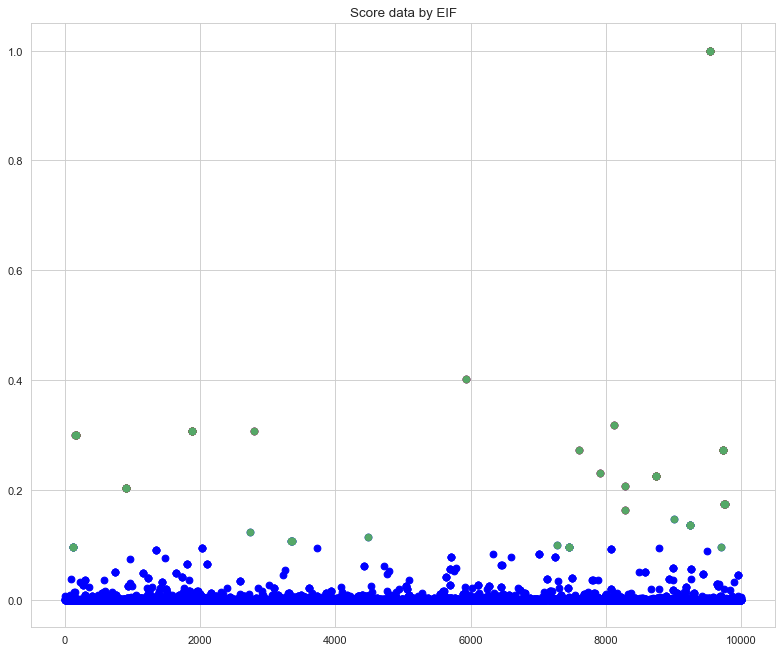

In [12]:
zz=(np.array(dds))
zz=zz.flatten()
print(zz,rr,optimal_threshold)
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')
plt.scatter(x[rr[:]>=1],y[rr[:]>=1],c='red')
plt.scatter(x[zz[:]>=1],y[zz[:]>=1],c='g')
plt.title('Score data by EIF')
plt.show()
